## Question 1 - Extracting Tesla Stock Data Using yfinance

In [8]:
import yfinance as yf
tesla = yf.Ticker("TSLA")
tesla_shares = tesla.history(period="1y")
tesla_shares.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-10-10 00:00:00-04:00,257.750000,268.940002,257.649994,263.619995,122656000,0.0,0.0
2023-10-11 00:00:00-04:00,266.200012,268.600006,260.899994,262.989990,103706300,0.0,0.0
2023-10-12 00:00:00-04:00,262.920013,265.410004,256.630005,258.869995,111508100,0.0,0.0
2023-10-13 00:00:00-04:00,258.899994,259.600006,250.220001,251.119995,102073800,0.0,0.0
2023-10-16 00:00:00-04:00,250.050003,255.399994,248.479996,253.919998,88917200,0.0,0.0


## Question 2 - Extracting Tesla Revenue Data Using Webscraping

In [21]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
url_revenue = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
data_revenue = requests.get(url_revenue).text
soup_revenue = BeautifulSoup(data_revenue, 'html.parser')
table = soup_revenue.find('table')
revenue_data = []
for row in table.find_all('tr')[1:]:  
    cols = row.find_all('td')

    cols = [col.text.strip() for col in cols]  
    revenue_data.append(cols)  
tesla_revenue = pd.DataFrame(revenue_data, columns=["Year", "Revenue"])
print(tesla_revenue.tail())

    Year Revenue
8   2013  $2,013
9   2012    $413
10  2011    $204
11  2010    $117
12  2009    $112


## Question 3 - Extracting GameStop Stock Data Using yfinance

In [10]:
import yfinance as yf
Gs = yf.Ticker("GME")
Gs_shares = Gs.history(period="1y")
Gs_shares.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-10-10 00:00:00-04:00,15.50,16.190001,15.40,16.00,2915900,0.0,0.0
2023-10-11 00:00:00-04:00,16.01,16.090000,15.74,15.82,2098200,0.0,0.0
2023-10-12 00:00:00-04:00,15.77,15.800000,14.82,15.09,3180300,0.0,0.0
2023-10-13 00:00:00-04:00,14.92,15.110000,14.78,14.92,1823300,0.0,0.0
2023-10-16 00:00:00-04:00,14.81,14.930000,14.15,14.43,3508600,0.0,0.0


## Question 4 - Extracting GameStop Revenue Data Using Webscraping

In [42]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

url_gme_revenue = "https://companiesmarketcap.com/gamestop/revenue/"
data_gme_revenue = requests.get(url_gme_revenue).text
soup_gme_revenue = BeautifulSoup(data_gme_revenue, 'html.parser')
table = soup_gme_revenue.find('table')
if table is None:
    print("Table not found on the page. Please check the URL or table structure.")
else:
    revenue_data_gme = []
    for row in table.find_all('tr')[1:]:  # Skip the header row
        cols = row.find_all('td')
        if len(cols) >= 2:  
            year = cols[0].text.strip()  
            revenue = cols[1].text.strip()  
            revenue_data_gme.append([year, revenue])

    # Create a DataFrame from the list of revenue data
    gme_revenue = pd.DataFrame(revenue_data_gme, columns=["Year", "Revenue"])

    # Display the last five rows of the gme_revenue DataFrame
    print(gme_revenue.tail())

    Year  Revenue
19  2005  $3.09 B
20  2004  $1.84 B
21  2003  $1.57 B
22  2002  $1.35 B
23  2001  $1.12 B


## Question 5 - Tesla Stock and Revenue Dashboard 

In [48]:
tesla.reset_index(inplace=True)

AttributeError: 'Ticker' object has no attribute 'reset_index'

<Axes: xlabel='Date'>

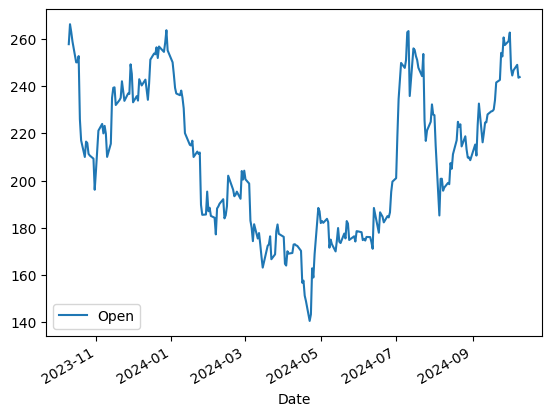

In [49]:
tesla_shares.plot(x="Date", y="Open")

## Question 6 - GameStop Stock and Revenue Dashboard

In [50]:
Gs_shares.reset_index(inplace=True)

<Axes: xlabel='Date'>

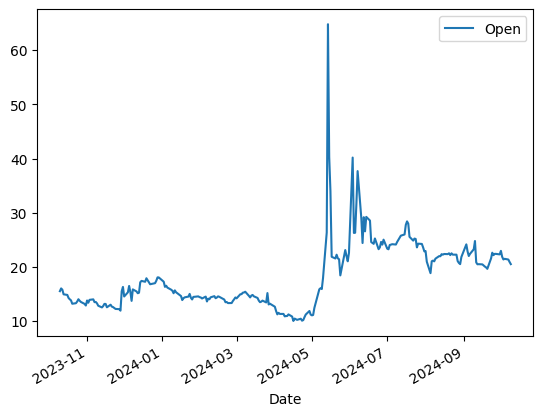

In [52]:
Gs_shares.plot(x="Date", y="Open")